In [123]:
import SimpleITK as sitk
import pims
# from nd2reader import ND2Reader
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import convert16to8bits


In [124]:
pims?

In [129]:
fixedI = pims.open('/home/jmamede/Data/multiplex/KOTHP1/DAPI-iGFP-INmruby3-bactin647_v01_PRJ.Custom.ome.tiff')[3]
movingI = pims.open('/home/jmamede/Data/multiplex/KOTHP1/DAPI-1a11_488-241_647_v01_PRJ.Custom.ome.tiff')[3]

# image_view = itk.GetImageViewFromArray( np_array)
# image = itk.GetImageFromArray( np_array)

In [130]:
from image_registration import chi2_shift,cross_correlation_shifts
from scipy.ndimage import shift

In [131]:
# fixedI = convert16to8bits(np.asarray(fixedI[3]),np.min(fixedI[3]),np.max(fixedI[3]))
# movingI = convert16to8bits(np.asarray(movingI[3]),np.min(movingI[3]),np.max(movingI[3]))
# fixedI.shape

In [92]:
# from skimage.registration import optical_flow_tvl1, optical_flow_ilk
# from skimage.transform import warp
# v, u = optical_flow_ilk(movingI, fixedI)
noise=0.01
xoff, yoff, exoff, eyoff = chi2_shift(fixedI,movingI,noise, return_error=True, upsample_factor='auto')



/home/jmamede/anaconda3/lib/python3.7/site-packages/image_registration/fft_tools/convolve_nd.py:269: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bigarray[arrayslices] = array
/home/jmamede/anaconda3/lib/python3.7/site-packages/image_registration/fft_tools/convolve_nd.py:270: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bigkernel[kernslices] = kernel
/home/jmamede/anaconda3/lib/python3.7/site-packages/image_registration/fft_tools/convolve_nd.py:325: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; u

In [93]:
print(xoff, yoff)
corrected_image = shift(movingI,shift=(xoff,yoff), mode='constant')


-78.076171875 67.576171875


In [94]:
corrected_image.shape

(2048, 2048)

In [95]:
reg_im = np.zeros((2048, 2048, 3))
reg_im[..., 0] = fixedI
reg_im[..., 1] = movingI
reg_im[..., 2] = corrected_image

In [101]:
import napari
v = napari.Viewer(ndisplay=2)

cmap = ['green','red','blue']
for i in range(2):
    v.add_image(reg_im[i],name='image'+str(i),blending='additive',colormap=cmap[i])

TypeError: add_image() got an unexpected keyword argument 'blening'

In [133]:
# xoff, yoff, exoff, eyoff = cross_correlation_shifts(fixedI,movingI)

ValueError: not enough values to unpack (expected 4, got 2)

In [98]:
import imreg_dft as ird

In [114]:
corrected_image = ird.similarity(fixedI,movingI, numiter=3)

In [119]:
corrected_image

{'tvec': array([-0.14497177,  0.03165953]),
 'success': 0.11141923595330952,
 'angle': -0.011558798864825803,
 'scale': 1.000794587735744,
 'Dscale': 0.0008599174040278565,
 'Dangle': 0.02197265625,
 'Dt': 0.25,
 'timg': array([[16.04023254, 14.68913128, 14.04607095, ...,  2.91568282,
          3.87708226,  4.04498997],
        [21.38659959, 18.69546511, 16.623902  , ...,  3.81096553,
          3.97202061,  4.00290246],
        [24.49662948, 19.02270258, 15.85304242, ...,  4.04988043,
          4.08130681,  4.08037014],
        ...,
        [ 2.76401285,  2.93903158,  2.99332186, ...,  3.98979868,
          4.24403702,  4.78601879],
        [ 3.07736517,  3.44618621,  3.46942907, ...,  2.72568624,
          4.38854571,  3.85686787],
        [ 2.9689932 ,  4.12039691,  3.70923928, ...,  2.18487347,
          3.3959083 ,  1.89994223]])}

In [117]:
reg_im = np.zeros((2048, 2048, 3))
reg_im[..., 0] = fixedI
reg_im[..., 1] = movingI
reg_im[..., 2] = corrected_image['timg']

In [118]:
import napari
v = napari.Viewer(ndisplay=2)

cmap = ['green','red','blue']
for i in range(3):
    v.add_image(reg_im[...,i],name='image'+str(i),blending='additive',colormap=cmap[i])

In [142]:
help(ird.similarity)

Help on function similarity in module imreg_dft.imreg:

similarity(im0, im1, numiter=1, order=3, constraints=None, filter_pcorr=0, exponent='inf', reports=None)
    Return similarity transformed image im1 and transformation parameters.
    Transformation parameters are: isotropic scale factor, rotation angle (in
    degrees), and translation vector.
    
    A similarity transformation is an affine transformation with isotropic
    scale and without shear.
    
    Args:
        im0 (2D numpy array): The first (template) image
        im1 (2D numpy array): The second (subject) image
        numiter (int): How many times to iterate when determining scale and
            rotation
        order (int): Order of approximation (when doing transformations). 1 =
            linear, 3 = cubic etc.
        filter_pcorr (int): Radius of a spectrum filter for translation
            detection
        exponent (float or 'inf'): The exponent value used during processing.
            Refer to the doc

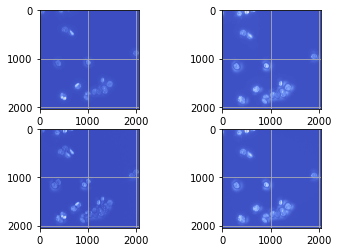

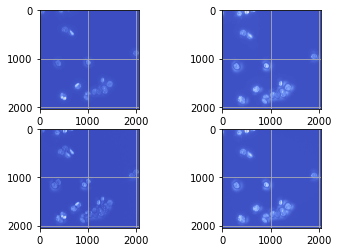

In [122]:
ird.imshow(fixedI,movingI,corrected_image['timg'])

In [134]:
import imreg

In [138]:
corrected_image, scale, angle, (t0, t1) = imreg.similarity(fixedI,movingI)

In [141]:
reg_im = np.zeros((2048, 2048, 3))
reg_im[..., 0] = fixedI
reg_im[..., 1] = movingI
reg_im[..., 2] = corrected_image

import napari
v = napari.Viewer(ndisplay=2)

cmap = ['green','red','blue']
for i in range(3):
    v.add_image(reg_im[...,i],name='image'+str(i),blending='additive',colormap=cmap[i])